# Cape Part 2 - Andrew's Solution

## Table of Contents

<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Supress-autoscrolling" data-toc-modified-id="Supress-autoscrolling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Supress autoscrolling</a></span></li><li><span><a href="#Draw-a-moist-adiabat-through-the-LFC" data-toc-modified-id="Draw-a-moist-adiabat-through-the-LFC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Draw a moist adiabat through the LFC</a></span><ul class="toc-item"><li><span><a href="#Grab-a-Little-Rock-sounding" data-toc-modified-id="Grab-a-Little-Rock-sounding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Grab a Little Rock sounding</a></span></li><li><span><a href="#Select-one-sounding" data-toc-modified-id="Select-one-sounding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Select one sounding</a></span></li><li><span><a href="#Save-the-metadata-for-plotting" data-toc-modified-id="Save-the-metadata-for-plotting-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Save the metadata for plotting</a></span></li><li><span><a href="#Convert-temperature-and-dewpoint-to-skew-coords" data-toc-modified-id="Convert-temperature-and-dewpoint-to-skew-coords-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Convert temperature and dewpoint to skew coords</a></span></li><li><span><a href="#Plot-the-sounding,-making-the-sounding-lines-thicker" data-toc-modified-id="Plot-the-sounding,-making-the-sounding-lines-thicker-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot the sounding, making the sounding lines thicker</a></span></li><li><span><a href="#turn-off-log(0)-warning" data-toc-modified-id="turn-off-log(0)-warning-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>turn off log(0) warning</a></span></li><li><span><a href="#find-the-$\theta_{es}$-of-the-surface-air,-draw-the-adiabat-through-point" data-toc-modified-id="find-the-$\theta_{es}$-of-the-surface-air,-draw-the-adiabat-through-point-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>find the $\theta_{es}$ of the surface air, draw the adiabat through point</a></span></li></ul></li></ul></div>

## Supress autoscrolling

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Draw a moist adiabat through the LFC

In [2]:
import numpy as np
import pandas as pd
from pprint import pformat

from a405.thermo.constants import constants as c
from a405.thermo.thermlib import convertSkewToTemp, convertTempToSkew
from a405.skewT.fullskew import makeSkewWet,find_corners,make_default_labels

In [3]:
from a405.soundings.wyominglib import write_soundings, read_soundings
from matplotlib import pyplot as plt

## Grab a Little Rock sounding

In [4]:
values=dict(region='naconf',year='2012',month='7',start='0100',stop='3000',station='72340')
write_soundings(values, 'littlerock')
soundings= read_soundings('littlerock')

687501
header is:  72340 LZK Little Rock Observations at 00Z 01 Jul 2012
here is the day:  120701
here is the day:  120701
here is the day:  120702
here is the day:  120702
here is the day:  120703
here is the day:  120703
here is the day:  120704
here is the day:  120704
here is the day:  120705
here is the day:  120705
here is the day:  120706
here is the day:  120706
here is the day:  120707
here is the day:  120707
here is the day:  120708
here is the day:  120708
here is the day:  120709
here is the day:  120709
here is the day:  120710
here is the day:  120710
here is the day:  120711
here is the day:  120711
here is the day:  120712
here is the day:  120712
here is the day:  120713
here is the day:  120713
here is the day:  120714
here is the day:  120714
here is the day:  120715
here is the day:  120715
here is the day:  120716
here is the day:  120716
here is the day:  120717
here is the day:  120717
here is the day:  120718
here is the day:  120718
here is the day:  120719
he

In [5]:
soundings['sounding_dict'].keys()

dict_keys([(2012, 7, 1, 0), (2012, 7, 1, 12), (2012, 7, 2, 0), (2012, 7, 2, 12), (2012, 7, 3, 0), (2012, 7, 3, 12), (2012, 7, 4, 0), (2012, 7, 4, 12), (2012, 7, 5, 0), (2012, 7, 5, 12), (2012, 7, 6, 0), (2012, 7, 6, 12), (2012, 7, 7, 0), (2012, 7, 7, 12), (2012, 7, 8, 0), (2012, 7, 8, 12), (2012, 7, 9, 0), (2012, 7, 9, 12), (2012, 7, 10, 0), (2012, 7, 10, 12), (2012, 7, 11, 0), (2012, 7, 11, 12), (2012, 7, 12, 0), (2012, 7, 12, 12), (2012, 7, 13, 0), (2012, 7, 13, 12), (2012, 7, 14, 0), (2012, 7, 14, 12), (2012, 7, 15, 0), (2012, 7, 15, 12), (2012, 7, 16, 0), (2012, 7, 16, 12), (2012, 7, 17, 0), (2012, 7, 17, 12), (2012, 7, 18, 0), (2012, 7, 18, 12), (2012, 7, 19, 0), (2012, 7, 19, 12), (2012, 7, 20, 0), (2012, 7, 20, 12), (2012, 7, 21, 0), (2012, 7, 21, 12), (2012, 7, 22, 0), (2012, 7, 22, 12), (2012, 7, 23, 0), (2012, 7, 23, 12), (2012, 7, 24, 0), (2012, 7, 24, 12), (2012, 7, 25, 0), (2012, 7, 25, 12), (2012, 7, 26, 0), (2012, 7, 26, 12), (2012, 7, 27, 0), (2012, 7, 27, 12), (2012, 7

## Select one sounding

In [6]:
the_time=(2012,7, 17,0) # was 17
sounding=soundings['sounding_dict'][the_time]
sounding.columns

Index(['Unnamed: 0', 'pres', 'hght', 'temp', 'dwpt', 'relh', 'mixr', 'drct',
       'sknt', 'thta', 'thte', 'thtv'],
      dtype='object')

## Save the metadata for plotting

In [7]:
title_string=soundings['attributes']['header']
index=title_string.find(' Observations at')
location=title_string[:index]
print(f'location: {location}')

units=soundings['attributes']['units'].split(';')
units_dict={}
for count,var in enumerate(sounding.columns[1:]):
    units_dict[var]=units[count]
#
# use the pretty printer to print the dictionary
#
print(f'units: {pformat(units_dict)}')

location: 72340 LZK Little Rock
units: {'drct': 'deg',
 'dwpt': 'C',
 'hght': 'm',
 'mixr': 'g/kg',
 'pres': 'hPa',
 'relh': '%',
 'sknt': 'knot',
 'temp': 'C',
 'thta': 'K',
 'thte': 'K',
 'thtv': 'K'}


## Convert temperature and dewpoint to skew coords

In [8]:
skew=45.
triplets=zip(sounding['temp'],sounding['dwpt'],sounding['pres'])
xcoord_T=[]
xcoord_Td=[]
for a_temp,a_dew,a_pres in triplets:
    xcoord_T.append(convertTempToSkew(a_temp,a_pres,skew))
    xcoord_Td.append(convertTempToSkew(a_dew,a_pres,skew))

## Plot the sounding, making the sounding lines thicker

In [9]:
def label_fun():
    """
    override the default rs labels with a tighter mesh
    """
    from numpy import arange
    #
    # get the default labels
    #
    tempLabels,rsLabels, thetaLabels, thetaeLabels = make_default_labels()
    #
    # change the temperature and rs grids
    #
    tempLabels = range(-40, 50, 2)
    rsLabels = [0.1, 0.25, 0.5, 1, 2, 3] + list(np.arange(4, 28, 2)) 
    return tempLabels,rsLabels, thetaLabels, thetaeLabels

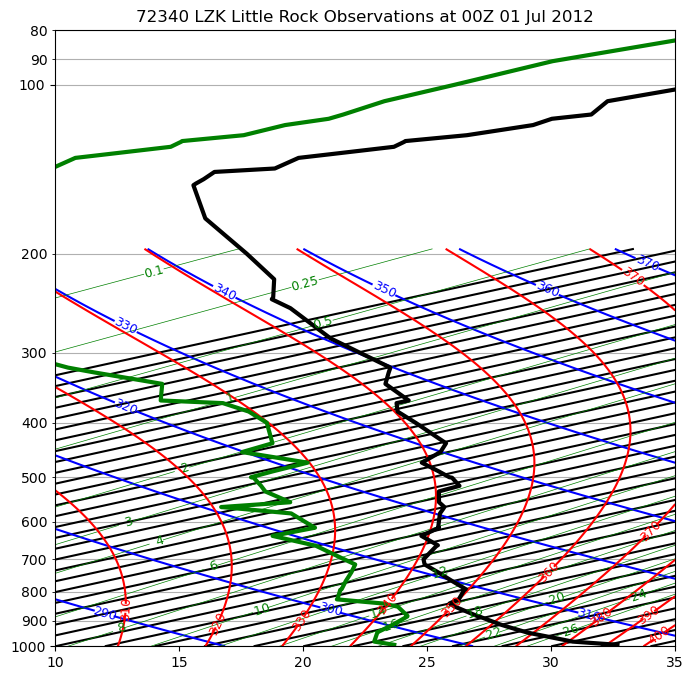

In [10]:
fig,ax =plt.subplots(1,1,figsize=(8,8))
corners = [10, 35]
ax, skew = makeSkewWet(ax, corners=corners, skew=skew,label_fun=label_fun)
#ax,skew = makeSkewWet(ax,corners=corners,skew=skew)
out=ax.set(title=title_string)
xcorners=find_corners(corners,skew=skew)
top_lim = 80 # hpa -- the height to stop calculating CAPE (fully in the stratosphere)
ax.set(xlim=xcorners,ylim=[1000,top_lim]);
l1,=ax.plot(xcoord_T,sounding['pres'],color='k',label='temp')
l2,=ax.plot(xcoord_Td,sounding['pres'],color='g',label='dew')
[line.set(linewidth=3) for line in [l1,l2]];

## turn off log(0) warning

In [11]:
np.seterr(all='ignore');

## Find the $\theta_{es}$ of the surface air, draw the adiabat through point

In [12]:
print(skew)

45.0


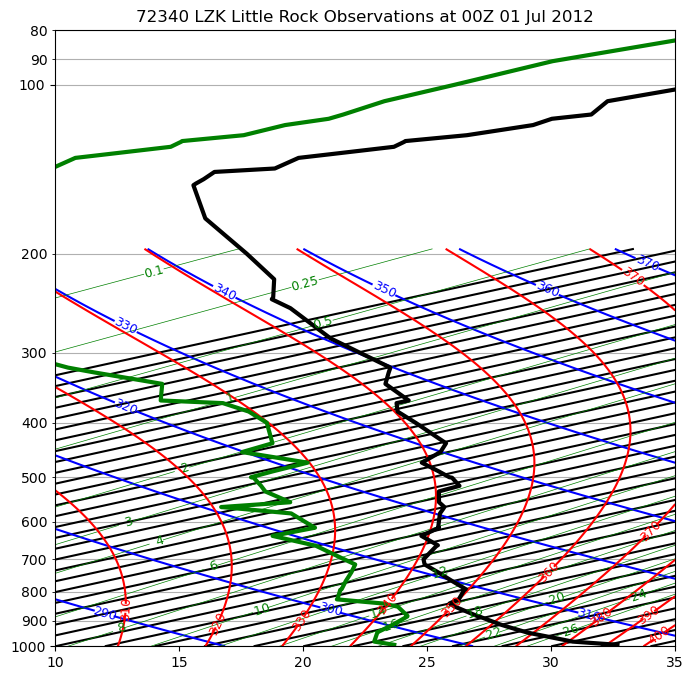

In [13]:
from a405.thermo.thermlib import find_Tmoist,find_thetaep,find_rsat,find_Tv
#
# find thetae of the surface air, at index 0
#
sfc_press,sfc_temp,sfc_td =[sounding[key][0] for key in ['pres','temp','dwpt']]
#
#  convert to mks and find surface rv and thetae
#
sfc_press,sfc_temp,sfc_td = sfc_press*100.,sfc_temp+c.Tc,sfc_td+c.Tc
sfc_rvap = find_rsat(sfc_temp,sfc_press)
sfc_thetae=find_thetaep(sfc_td,sfc_temp,sfc_press)
press=sounding['pres'].values*100.
#
# find the index for 200 hPa pressure -- searchsorted requires
# the pressure array to be increasing, so flip it for the search,
# then flip the index.  Above 200 hPa thetae goes bananas, so
# so trim so we only have good values
#
toplim=len(press) - np.searchsorted(press[::-1],2.e4)
press=press[:toplim]
#
# find temps along that adiabat
#
adia_temps= np.array([find_Tmoist(sfc_thetae,the_press) for the_press in press])
adia_rvaps = find_rsat(adia_temps,press)
adia_rls = sfc_rvap - adia_rvaps
env_temps = (sounding['temp'].values + c.Tc)[:toplim]
env_Td = (sounding['dwpt'].values + c.Tc)[:toplim]
height = sounding['hght'].values[:toplim]
pairs = zip(env_Td,press)
env_rvaps= np.array([find_rsat(td,the_press) for td,the_press in pairs])
env_Tv = find_Tv(env_temps,env_rvaps)
adia_Tv = find_Tv(adia_temps,adia_rvaps,adia_rls)
xcoord_thetae=[]
press_hPa = press*1.e-2
#
# convert the adiabatic thetae sounding to skewT coords
#
for a_temp,a_press in zip(adia_temps - c.Tc,press_hPa):
    out=convertTempToSkew(a_temp,a_press,skew)
    xcoord_thetae.append(out)
#ax.plot(xcoord_thetae,press_hPa,color='r',label='thetae',linewidth=3.)
display(fig)

## Andrew's Code

For Friday, calculate the buoyancy defined by Thompkins eq. 1.61 as a function of height, where Tv,a is the virtual temperature of the pseudoadiabat and Tv,env is the virtual temperature of your particular environmental sounding as a function of height using the lowest level to calculate the thetae for the moist adiabat. Check in a notebook that extends cape_part1_html by defining the function (ok to copy code from my library), running it and plotting it vs. height.

---

* *Note: Pseudo-adiabatic means we assume all the liquid water falls out of a parcel immediately, so the density/buoyancy of the parcel is determined by the virtual temperature alone*

* *Also -- the function `find_buoy()` is already in the thermlib library... Ill make my own for the sake of the exercise*

*AT 1.61:*

$$
B = g\left(\frac{T_{v,a}-T_{v,env}}{T_{v,env}}\right)
$$

In [14]:
import a405.thermo.thermlib as tl
from a405.thermo.constants import constants as c


def get_buoy(T, Td, pres):
    """
    Given an atmospheric sounding (Temperature and dew point profiles),
    calculate the buoyant force per unit mass (m/s2) of an air parcel
    originating from the surface as as it ascends. Thompkins Eqn 1.61

    Parameters
    ----------

    T: array-like
        Temperature profile (K)
    Td: array-like
        Dew point temperature profile (K)
    pres: array-like
        Pressures at which to calculate B (Pa)

    Returns
    -------

    B: array-like
        Buoyancy per unit mass (m/s2)
    """
    # initialize arrays
    T_parcel = np.zeros_like(np.asarray(pres))
    #buoy = np.zeros_like(np.asarray(pres))
    
    ## 1) get the trajectory of the ascending parcel ##
    Tsurf = T[0]
    Tdsurf = Td[0]
    psurf = pres[0]
    theta_surf = tl.find_theta(Tsurf, c.p0)
    Tlcl, plcl = tl.find_lcl(Tdsurf, Tsurf, psurf)

    # trajectory below LCL follows dry adiabat
    T_parcel[pres > plcl] = tl.make_dry_adiabat(theta_surf, pres[pres > plcl])
    
    # trajectory above LCL follows moist adiabat
    thetaes = tl.find_thetaes(Tlcl, plcl)
    T_parcel[pres <= plcl] = [tl.find_Tmoist(thetaes, p, use_theta=True) for p in pres[pres <= plcl]]

    ## 2) calculate the buoyant force per unit mass
    # get the virtual temperatures of the sounding and pseudo-adiabatic ascent
    r_parcel = np.zeros_like(T_parcel)
    r_parcel[pres > plcl] = tl.find_rsat(Tdsurf, psurf) # unsaturated ascent
    r_parcel[pres <= plcl] = tl.find_rsat(T_parcel[pres <= plcl], pres[pres <= plcl]) # all water precipitates out
    Tv_parcel = tl.find_Tv(T_parcel, r_parcel)
   
    r_env = tl.find_rsat(Td, pres)
    Tv_env = tl.find_Tv(T, r_env)
    
    # Thompkins 1.61
    buoy = c.g0 * (Tv_parcel - Tv_env) / Tv_env
    return T_parcel, buoy

In [15]:
# convert inputs to SI units and get buoyancy
temp = sounding['temp'] + c.Tc
dwpt = sounding['dwpt'] + c.Tc
pres = sounding['pres'] * c.hPa2pa

T_parcel, buoy = get_buoy(temp, dwpt, pres)

/var/folders/h3/5svt7fds58v0x7kkc54kl3640000gn/T/ipykernel_28237/1058510117.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


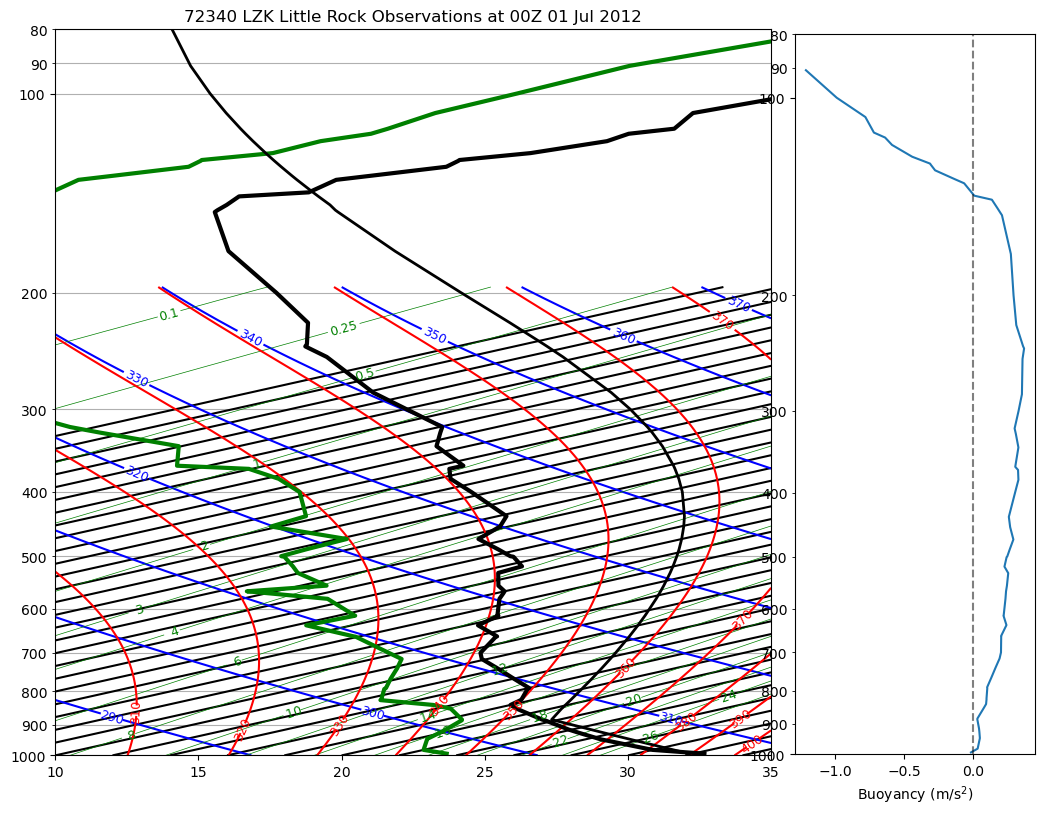

In [16]:
# plot the result

# add parcel trajectory (pseudo-adiabatic)
skew_parcel = convertTempToSkew(T_parcel - c.Tc, sounding.pres, skew)
ax.plot(skew_parcel, sounding.pres, "k", linewidth=2)

# add subplot to show buoyant force/mass with height
cutoff = sounding.pres > top_lim  # (hPa) virtual temp calculations are "bananas" above cutoff, dont trust them
ax2 = fig.add_axes((1, 0.05, 0.3, 0.9), sharey=ax)
ax2.plot(buoy[cutoff], sounding.pres[cutoff])
ax2.axvline(0, color="k", alpha=0.5, linestyle="--")
ax2.set_xlabel("Buoyancy (m/s$^2$)")
fig.tight_layout()

display(fig)

### Part 2: Calculate CAPE

We already did the hard work to calculate the buoyancy (force), all we have to do is integrate it over the distance travelled to get the potential energy (i.e. work = force x dist).

In [17]:
# get the distance bw each point
layer_ht = np.diff(sounding.hght)
len(layer_ht)

115

In [18]:
# now we have a fencepost problem, one more buoy measurements than layers
len(buoy)

116

In [19]:
# solve by averaging the bouyancy across each layer
lyr_buoy = [(buoy[i] + buoy[i + 1]) / 2 for i in range(len(buoy) - 1)]

# integrate it up to a cut pressure
cutoff = np.asarray(sounding.pres[:-1] > 100)
CAPE_elems = lyr_buoy * layer_ht # F * ds

CAPE = np.sum(CAPE_elems[cutoff])

In [20]:
print(f"{CAPE = } J/kg")

CAPE = 2396.575945084563 J/kg


Put this in a function that takes in a sounding and calculates CAPE up to a specified cut pressure

In [21]:
def get_CAPE(sounding, cutpres):
    """
    calculates CAPE
    """
    temp = sounding["temp"] + c.Tc
    dwpt = sounding["dwpt"] + c.Tc
    pres = sounding["pres"] * c.hPa2pa

    _, buoy = get_buoy(temp, dwpt, pres)
    lyr_buoy = [(buoy[i] + buoy[i + 1]) / 2 for i in range(len(buoy) - 1)]
    cutoff = np.asarray(sounding.pres[:-1] > cutpres)
    CAPE_elems = lyr_buoy * layer_ht
    return np.sum(CAPE_elems[cutoff])

Now find the level of neutral buoyancy where the ascending parcel and the environment sounding cross

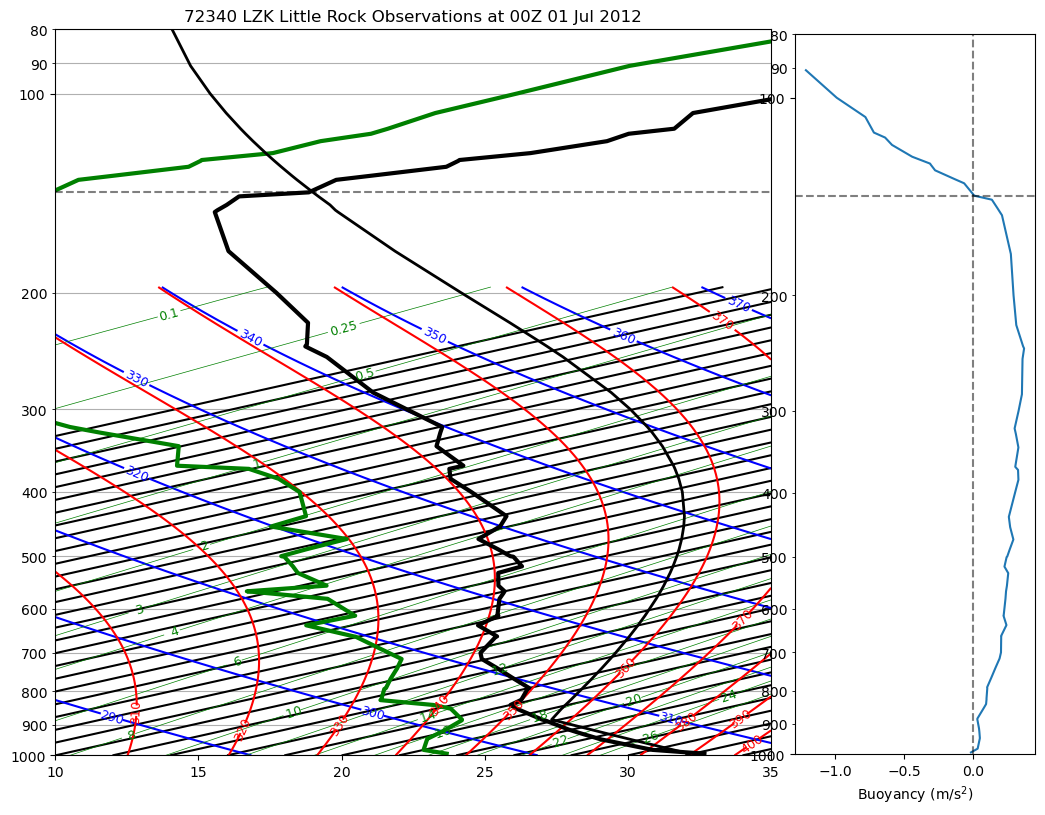

In [22]:
def get_LNB(sounding):
    """
    gets the level of neutral bouyancy
    """
    # define an area in which to look for the LNB
    ignore = sounding.pres > 400  # we wouldnt find a crossing below here on a day
                                  # where we are expecting deep convection to occur
    temp = sounding["temp"] + c.Tc
    dwpt = sounding["dwpt"] + c.Tc
    pres = sounding["pres"] * c.hPa2pa
    _, buoy = get_buoy(temp, dwpt, pres)
    buoy[ignore] = 10
    LNB = pres[np.argmin(abs(buoy))]
    return LNB


LNB = get_LNB(sounding)

# plot it
ax.axhline(LNB / 100, color="k", alpha=0.5, linestyle="--")
ax2.axhline(LNB / 100, color="k", alpha=0.5, linestyle="--")
display(fig)

Now, we want the maximum updraft velocity. We know the cumulative energy supplied to the parcel (CAPE up to its current altitude, the highest energy obviously at the LNB). Now, boldly assume that 100% of that energy is converted into kinetic energy of the updraft with zero drag:

$$
CAPE\cdot m = \frac{1}{2}mw^2
$$

solve for $w$ to arrive at Thompkins 3.4:

$$
w_{max} = \sqrt{2CAPE_{p_s}}\tag{AT3.4}
$$

Find $w_{max}$ of our sounding:

In [23]:
CAPE = get_CAPE(sounding, LNB/100)
wmax = (2 * CAPE) ** 0.5
print(f"{wmax = } m/s")

wmax = 83.03954292054694 m/s


That seems unrealistically fast. Perhaps drag is indeed relevant in the real atmosphere. Now rootfind the maximum cloud top height where all of that energy is dissipated into the temperature inversion at the tropopause

In [24]:
from scipy import optimize

def rootfind_CAPE(pres, *args):
    """
    finds CAPE but, set up for rootfinding function to detect cloud top
    
    args = [sounding]
    """
    sounding = args[0]
    return get_CAPE(sounding, pres)

In [25]:
# get the pressure at the highest possible cloud top
cldtop = optimize.zeros.brentq(rootfind_CAPE, 10, 400, args=(sounding))

/var/folders/h3/5svt7fds58v0x7kkc54kl3640000gn/T/ipykernel_28237/2653660762.py:2: DeprecationWarning: Please use `brentq` from the `scipy.optimize` namespace, the `scipy.optimize.zeros` namespace is deprecated.
  cldtop = optimize.zeros.brentq(rootfind_CAPE, 10, 400, args=(sounding))


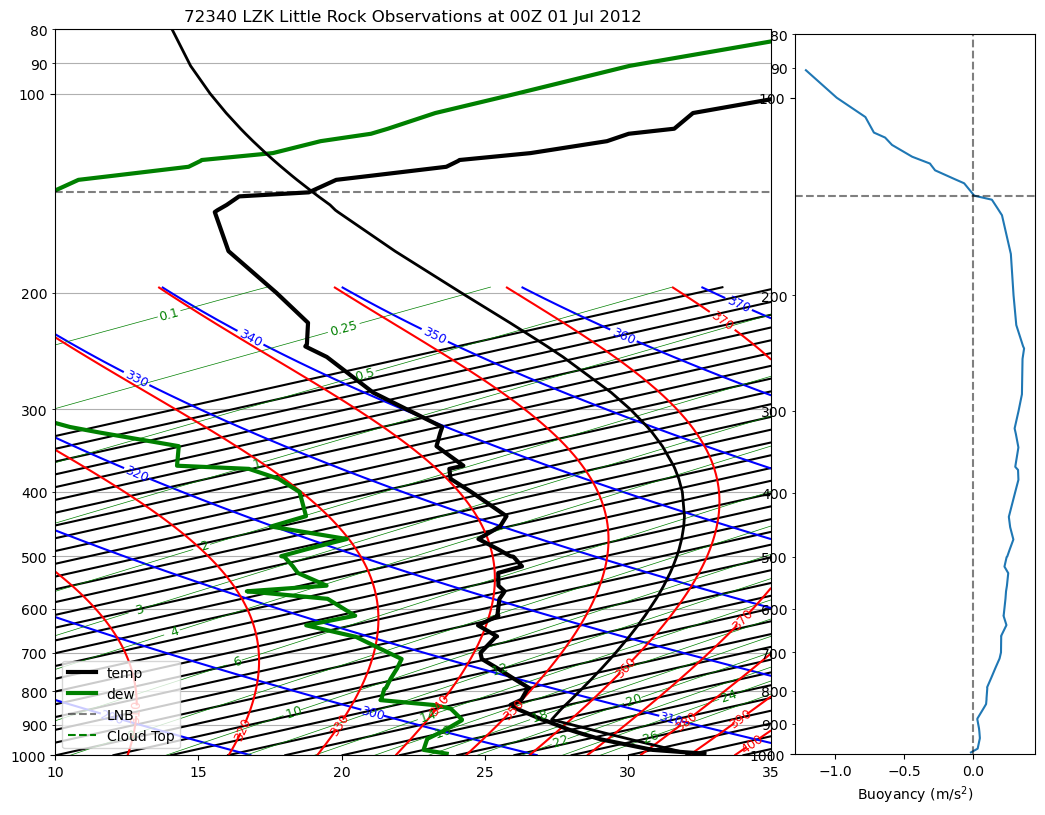

In [26]:
# plot everything we just found
ax.axhline(LNB, color="k", alpha=0.5, linestyle="--", label="LNB")
ax2.axhline(LNB, color="k", alpha=0.5, linestyle="--")

ax.axhline(cldtop, color="g", linestyle="--", label="Cloud Top")
ax2.axhline(cldtop, color="g", linestyle="--")

ax.legend()
display(fig)